<a href="https://colab.research.google.com/github/Carlos1729/Transformers_Code/blob/main/Mutlihead_Attention_Madhukar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Multi Head Attention

In [36]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import math

In [37]:
sequence_length = 4#my nam is ajay
batch_size = 1#for parallel processing
input_dim = 512
d_model = 512
x = torch.randn( (batch_size, sequence_length, input_dim) )

In [38]:
x.size()

torch.Size([1, 4, 512])

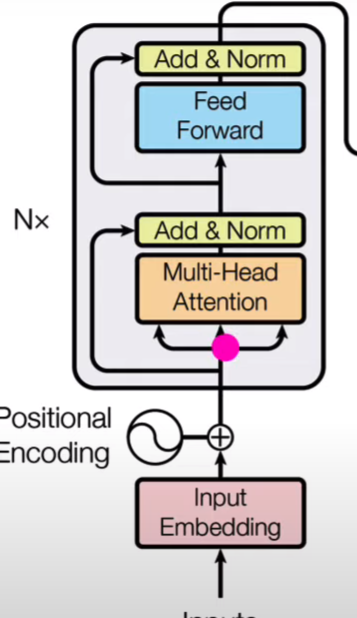

In [39]:
qkv_layer = nn.Linear(input_dim , 3 * d_model)

In [40]:
qkv = qkv_layer(x)

In [41]:
qkv

tensor([[[ 0.9611,  0.2217, -0.6445,  ...,  0.6668,  0.2763, -1.4719],
         [ 0.5043, -0.2508,  0.2639,  ..., -0.9242, -0.3808,  0.6141],
         [-0.2875,  0.7088,  0.5289,  ...,  0.7836,  1.0327, -0.1889],
         [ 0.1465, -0.6952, -0.8255,  ...,  0.3841, -0.7523, -0.0924]]],
       grad_fn=<ViewBackward0>)

In [42]:
qkv.shape

torch.Size([1, 4, 1536])

Text(0.5, 1.0, 'qkv distribution')

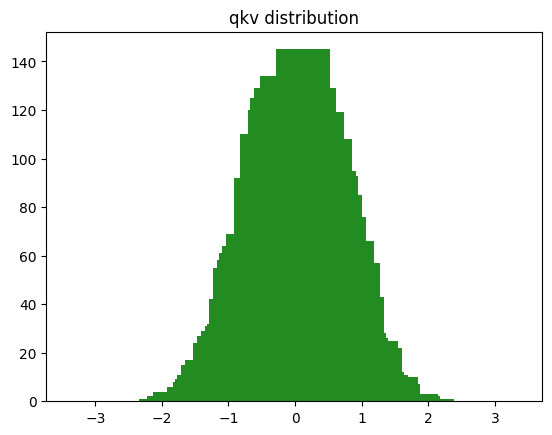

In [43]:
import matplotlib.pyplot as plt
y_val = torch.histc(qkv, bins=200, min=-3, max=3)
x_val = np.arange(-1, 1, 0.01) * 3
plt.bar(x_val, y_val, align='center', color=['forestgreen'])
plt.title('qkv distribution')

In [44]:
num_heads = 8#8 Attention heads in total
head_dim = d_model // num_heads
qkv = qkv.reshape(batch_size, sequence_length, num_heads, 3 * head_dim)

In [45]:
qkv.shape

torch.Size([1, 4, 8, 192])

In [46]:
qkv = qkv.permute(0, 2, 1, 3) # [batch_size, num_heads, sequence_length, 3*head_dim]
qkv.shape

torch.Size([1, 8, 4, 192])

In [47]:
q, k, v = qkv.chunk(3, dim=-1)
q.shape, k.shape, v.shape

(torch.Size([1, 8, 4, 64]),
 torch.Size([1, 8, 4, 64]),
 torch.Size([1, 8, 4, 64]))

## Self Attention for multiple heads

For a single head:
$$
\text{self attention} = softmax\bigg(\frac{Q.K^T}{\sqrt{d_k}}+M\bigg)
$$

$$
\text{new V} = \text{self attention}.V
$$

In [48]:
q.shape, k.shape

(torch.Size([1, 8, 4, 64]), torch.Size([1, 8, 4, 64]))

In [49]:
d_k = q.size()[-1]                 ##To transpose last 2 dimensions
scaled = torch.matmul(q, k.transpose(-2, -1)) / math.sqrt(d_k)
scaled.shape

torch.Size([1, 8, 4, 4])

In [50]:
k.T.shape

torch.Size([64, 4, 8, 1])

In [51]:
y = torch.randn(2, 3)
y

tensor([[ 0.4430,  1.2020, -2.2885],
        [ 0.3372, -0.5354, -0.7914]])

In [52]:
torch.transpose(y, 0, 1)

tensor([[ 0.4430,  0.3372],
        [ 1.2020, -0.5354],
        [-2.2885, -0.7914]])

In [53]:
torch.transpose(y, 1, 0)

tensor([[ 0.4430,  0.3372],
        [ 1.2020, -0.5354],
        [-2.2885, -0.7914]])

In [54]:
k

tensor([[[[-0.3069, -0.0437, -0.8125,  ..., -0.8037, -0.2048,  0.7815],
          [-0.5530,  0.5863, -0.7931,  ...,  0.4654,  1.8427,  0.6485],
          [-0.2455, -0.7506, -0.4566,  ...,  0.0033,  0.1298,  0.5040],
          [ 0.4319, -0.0175, -1.0827,  ...,  0.2772,  0.5052, -0.3644]],

         [[-0.2819,  0.6387, -0.0620,  ...,  0.9624,  0.6536,  0.5616],
          [ 0.4415, -0.3536,  0.2217,  ...,  0.5887, -1.3416,  0.4077],
          [ 0.5700, -0.0204,  1.0573,  ..., -0.2502,  0.7970, -0.1981],
          [-0.0664, -0.0520, -0.3696,  ..., -0.7599, -0.3644,  0.5634]],

         [[ 0.0108, -0.5957,  1.7341,  ..., -0.0328,  0.9143,  0.6240],
          [-0.2429,  0.0957,  1.0006,  ...,  0.6754, -0.9228, -0.4608],
          [-0.3667,  0.0897, -0.1847,  ...,  1.0267,  0.3168,  0.2139],
          [-0.0822,  0.4163,  0.9518,  ..., -0.2107, -0.3147,  0.8930]],

         ...,

         [[ 0.3418, -0.2172,  0.2998,  ..., -1.0051, -0.9407,  0.1157],
          [ 0.0544, -0.2866, -0.2246,  ...,

In [55]:
k.shape

torch.Size([1, 8, 4, 64])

In [56]:
vit = k.transpose(-1, -2)

In [57]:
vit.shape#transpose wrt to last 2 integers

torch.Size([1, 8, 64, 4])

In [58]:
k.transpose(-1, -2) == k.transpose(-2, -1)

tensor([[[[True, True, True, True],
          [True, True, True, True],
          [True, True, True, True],
          ...,
          [True, True, True, True],
          [True, True, True, True],
          [True, True, True, True]],

         [[True, True, True, True],
          [True, True, True, True],
          [True, True, True, True],
          ...,
          [True, True, True, True],
          [True, True, True, True],
          [True, True, True, True]],

         [[True, True, True, True],
          [True, True, True, True],
          [True, True, True, True],
          ...,
          [True, True, True, True],
          [True, True, True, True],
          [True, True, True, True]],

         ...,

         [[True, True, True, True],
          [True, True, True, True],
          [True, True, True, True],
          ...,
          [True, True, True, True],
          [True, True, True, True],
          [True, True, True, True]],

         [[True, True, True, True],
          [True, 

In [59]:
k.transpose(-1, -2).shape

torch.Size([1, 8, 64, 4])

In [60]:
mask = torch.full(scaled.size() , float('-inf'))
mask = torch.triu(mask, diagonal=1)
mask.shape

torch.Size([1, 8, 4, 4])

In [61]:
mask

tensor([[[[0., -inf, -inf, -inf],
          [0., 0., -inf, -inf],
          [0., 0., 0., -inf],
          [0., 0., 0., 0.]],

         [[0., -inf, -inf, -inf],
          [0., 0., -inf, -inf],
          [0., 0., 0., -inf],
          [0., 0., 0., 0.]],

         [[0., -inf, -inf, -inf],
          [0., 0., -inf, -inf],
          [0., 0., 0., -inf],
          [0., 0., 0., 0.]],

         [[0., -inf, -inf, -inf],
          [0., 0., -inf, -inf],
          [0., 0., 0., -inf],
          [0., 0., 0., 0.]],

         [[0., -inf, -inf, -inf],
          [0., 0., -inf, -inf],
          [0., 0., 0., -inf],
          [0., 0., 0., 0.]],

         [[0., -inf, -inf, -inf],
          [0., 0., -inf, -inf],
          [0., 0., 0., -inf],
          [0., 0., 0., 0.]],

         [[0., -inf, -inf, -inf],
          [0., 0., -inf, -inf],
          [0., 0., 0., -inf],
          [0., 0., 0., 0.]],

         [[0., -inf, -inf, -inf],
          [0., 0., -inf, -inf],
          [0., 0., 0., -inf],
          [0., 0., 0.,

In [62]:
mask[0][1] # mask for input to a single head

tensor([[0., -inf, -inf, -inf],
        [0., 0., -inf, -inf],
        [0., 0., 0., -inf],
        [0., 0., 0., 0.]])

In [63]:
scaled

tensor([[[[-0.0128,  0.0955,  0.1097, -0.2068],
          [-0.1086, -0.0412, -0.1947, -0.1733],
          [-0.3151, -0.5522, -0.5018, -0.1870],
          [ 0.5454, -0.3221,  0.5300,  0.1733]],

         [[ 0.4118,  0.5490, -0.1740,  0.2923],
          [ 0.2469, -0.4950,  0.3424, -0.1130],
          [-0.3648,  0.4122, -0.5199,  0.1273],
          [ 0.3485, -0.3608, -0.2604, -0.0133]],

         [[-0.9205, -0.3180,  0.2684, -0.4778],
          [ 0.7362,  0.2612, -0.1417,  0.2914],
          [ 0.4758,  0.1985, -0.1593,  0.0764],
          [ 0.6361,  0.1426, -0.4436,  0.1222]],

         [[ 0.8694,  0.0916, -0.0477,  0.5700],
          [-0.1084,  0.1935,  0.1134,  0.4249],
          [ 0.2229, -0.1724, -0.4562,  0.2999],
          [ 0.4526,  0.0582,  0.2472,  0.2934]],

         [[ 0.5610,  0.6911,  0.3803, -0.7925],
          [ 0.0062,  0.5957,  0.3716,  0.1534],
          [-0.3016,  0.1083,  0.4666, -0.3218],
          [ 0.4579,  0.3421,  0.3114, -0.3705]],

         [[-0.1563, -0.3613, -

In [64]:
(scaled + mask)[0][0]

tensor([[-0.0128,    -inf,    -inf,    -inf],
        [-0.1086, -0.0412,    -inf,    -inf],
        [-0.3151, -0.5522, -0.5018,    -inf],
        [ 0.5454, -0.3221,  0.5300,  0.1733]], grad_fn=<SelectBackward0>)

In [65]:
scaled += mask

In [66]:
np.exp(0.5596) / (np.exp(0.5596) + np.exp(0.0404))

0.6269606805367254

In [67]:
attention = F.softmax(scaled, dim=-1)

In [68]:
attention.shape

torch.Size([1, 8, 4, 4])

In [69]:
attention[0][0]

tensor([[1.0000, 0.0000, 0.0000, 0.0000],
        [0.4832, 0.5168, 0.0000, 0.0000],
        [0.3819, 0.3013, 0.3168, 0.0000],
        [0.3232, 0.1357, 0.3183, 0.2228]], grad_fn=<SelectBackward0>)

In [70]:
values = torch.matmul(attention, v)
values.shape

torch.Size([1, 8, 4, 64])

## Function

In [71]:
import math

def scaled_dot_product(q, k, v, mask=None):
    d_k = q.size()[-1]
    scaled = torch.matmul(q, k.transpose(-1, -2)) / math.sqrt(d_k)
    if mask is not None:
        scaled += mask
    attention = F.softmax(scaled, dim=-1)
    values = torch.matmul(attention, v)
    return values, attention

In [72]:
values, attention = scaled_dot_product(q, k, v, mask=mask)

In [73]:
attention.shape

torch.Size([1, 8, 4, 4])

In [74]:
attention[0][0]

tensor([[1.0000, 0.0000, 0.0000, 0.0000],
        [0.4832, 0.5168, 0.0000, 0.0000],
        [0.3819, 0.3013, 0.3168, 0.0000],
        [0.3232, 0.1357, 0.3183, 0.2228]], grad_fn=<SelectBackward0>)

In [75]:
values.size()

torch.Size([1, 8, 4, 64])

In [76]:
values = values.reshape(batch_size, sequence_length, num_heads * head_dim)
values.size()

torch.Size([1, 4, 512])

In [77]:
linear_layer = nn.Linear(d_model, d_model)

In [78]:
out = linear_layer(values)

In [79]:
out.shape

torch.Size([1, 4, 512])

In [80]:
out

tensor([[[-0.0264,  0.4222,  0.0294,  ...,  0.1499, -0.1010,  0.1874],
         [-0.1722,  0.0335,  0.1324,  ..., -0.1754,  0.2094,  0.0882],
         [ 0.1540,  0.1161,  0.1892,  ..., -0.1285, -0.0562,  0.3447],
         [-0.0518, -0.3604,  0.0541,  ...,  0.2070, -0.2770, -0.3220]]],
       grad_fn=<ViewBackward0>)

## Class

In [81]:
import torch
import torch.nn as nn
import math

def scaled_dot_product(q, k, v, mask=None):
    d_k = q.size()[-1]
    scaled = torch.matmul(q, k.transpose(-1, -2)) / math.sqrt(d_k)
    if mask is not None:
        scaled += mask
    attention = F.softmax(scaled, dim=-1)
    values = torch.matmul(attention, v)
    return values, attention

class MultiheadAttention(nn.Module):

    def __init__(self, input_dim, d_model, num_heads):
        super().__init__()
        self.input_dim = input_dim
        self.d_model = d_model
        self.num_heads = num_heads
        self.head_dim = d_model // num_heads
        self.qkv_layer = nn.Linear(input_dim , 3 * d_model)
        self.linear_layer = nn.Linear(d_model, d_model)

    def forward(self, x, mask=None):
        batch_size, sequence_length, input_dim = x.size()
        print(f"x.size(): {x.size()}")
        qkv = self.qkv_layer(x)
        print(f"qkv.size(): {qkv.size()}")
        qkv = qkv.reshape(batch_size, sequence_length, self.num_heads, 3 * self.head_dim)
        print(f"qkv.size(): {qkv.size()}")
        qkv = qkv.permute(0, 2, 1, 3)
        print(f"qkv.size(): {qkv.size()}")
        q, k, v = qkv.chunk(3, dim=-1)
        print(f"q size: {q.size()}, k size: {k.size()}, v size: {v.size()}, ")
        values, attention = scaled_dot_product(q, k, v, mask)
        print(f"values.size(): {values.size()}, attention.size:{ attention.size()} ")
        values = values.reshape(batch_size, sequence_length, self.num_heads * self.head_dim)
        print(f"values.size(): {values.size()}")
        out = self.linear_layer(values)
        print(f"out.size(): {out.size()}")
        return out


## Input

In [82]:
input_dim = 1024
d_model = 512
num_heads = 8

batch_size = 30
sequence_length = 5
x = torch.randn( (batch_size, sequence_length, input_dim) )

model = MultiheadAttention(input_dim, d_model, num_heads)
out = model.forward(x)

x.size(): torch.Size([30, 5, 1024])
qkv.size(): torch.Size([30, 5, 1536])
qkv.size(): torch.Size([30, 5, 8, 192])
qkv.size(): torch.Size([30, 8, 5, 192])
q size: torch.Size([30, 8, 5, 64]), k size: torch.Size([30, 8, 5, 64]), v size: torch.Size([30, 8, 5, 64]), 
values.size(): torch.Size([30, 8, 5, 64]), attention.size:torch.Size([30, 8, 5, 5]) 
values.size(): torch.Size([30, 5, 512])
out.size(): torch.Size([30, 5, 512])
